In [2]:
import fastbook
fastbook.setup_book()

In [7]:
from fastai.vision.core import *
from fastbook import *

In [4]:
import ipywidgets as ipyw

In [48]:
import pathlib
import os
import shutil

# global params

In [21]:
DIR_IMAGES = pathlib.Path('./tmp/guitars')

In [19]:
KEYWORDS = {
    'stratocaster' : 'guitar fender stratocaster',
    'telecaster' : 'guitar fender telecaster',
    'rd' : 'guitar gibson rd',
}

# set azure key

In [5]:
key_widget = ipyw.Password(description='Azure key', value=None)
key_widget

Password(description='Azure key')

In [6]:
azure_key = key_widget.value

# download images

In [22]:
for label, keywords in KEYWORDS.items():
    dest = DIR_IMAGES/label
    dest.mkdir(parents=True)
    
    search_res = search_images_bing(azure_key, keywords)
    download_images(dest, urls=search_res.attrgot('contentUrl'))

In [27]:
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(),
    get_items=get_image_files,
    get_y=parent_label,
)

# verify images

In [41]:
broken = verify_images(get_files(DIR_IMAGES))

In [52]:
dest_broken = DIR_IMAGES.with_suffix('.broken')
if not dest_broken.exists():
    dest_broken.mkdir(parents=True)

for src_path in broken:
    parts = list(src_path.parts)
    parts[0] = str(dest_broken)
    dst_path = pathlib.Path(os.path.join(*parts[:-1]))
    if not dst_path.exists():
        dst_path.mkdir(parents=True)
        
    shutil.move(str(src_path), str(dst_path))

# dataloader

In [53]:
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(),
    get_items=get_image_files,
    get_y=parent_label,
)

In [54]:
dl = guitars.dataloaders(source=DIR_IMAGES)

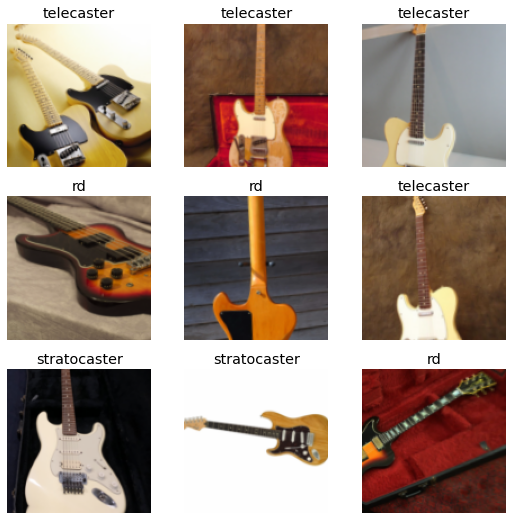

In [55]:
dl.show_batch()

# train

In [60]:
learner = cnn_learner(dl, resnet34, metrics=error_rate)

In [61]:
learner.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.753933,0.948728,0.356322,00:19


epoch,train_loss,valid_loss,error_rate,time
0,1.318073,0.696282,0.252874,00:23
1,1.086817,0.491375,0.183908,00:24
2,0.926490,0.358373,0.149425,00:25
3,0.775704,0.425952,0.149425,00:24
4,0.645267,0.441608,0.160920,00:24
5,0.560471,0.422660,0.126437,00:23
6,0.484706,0.457028,0.126437,00:24
7,0.430819,0.422510,0.114943,00:24
8,0.382135,0.377265,0.103448,00:23
9,0.343695,0.363606,0.103448,00:23


In [62]:
learner.export('models/guitars_classifier.pkl')

# check misclassifications

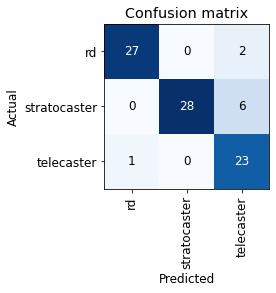

In [64]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.plot_confusion_matrix()

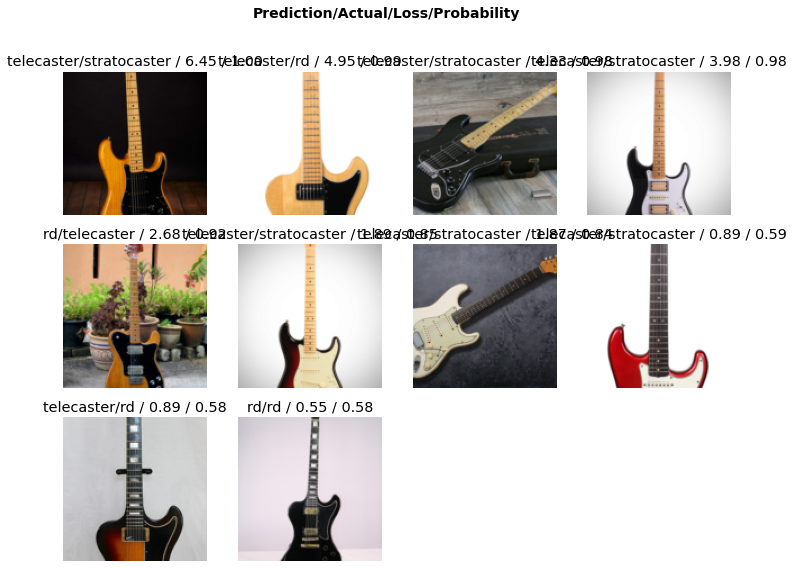

In [66]:
interpreter.plot_top_losses(k=10)